In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#load dataset
iris = load_iris()
X = iris.data[:, :2] # Use only the first two features for visualization
y = iris.target
feature_names = iris.feature_names[:2]
target_names = iris.target_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate accuracy
print("Decision Tree Test Accuracy:", accuracy_score(y_test, tree.predict(X_test)))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Decision Tree Test Accuracy: 0.7555555555555555
Random Forest Test Accuracy: 0.7555555555555555


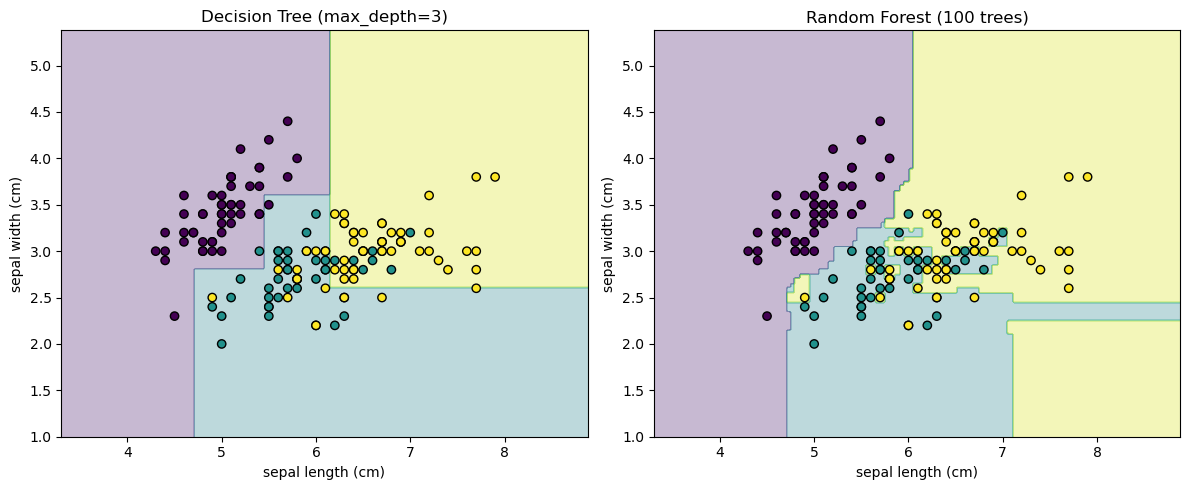

In [3]:
# Create mesh grid
h = 0.02  # Smaller step for smoother visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot setup
plt.figure(figsize=(12, 5))

# Decision Tree plot
plt.subplot(1, 2, 1)
Z_tree = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_tree = Z_tree.reshape(xx.shape)
plt.contourf(xx, yy, Z_tree, cmap='viridis', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Decision Tree (max_depth=3)")

# Random Forest plot
plt.subplot(1, 2, 2)
Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rf, cmap='viridis', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Random Forest (100 trees)")

plt.tight_layout()
plt.show()

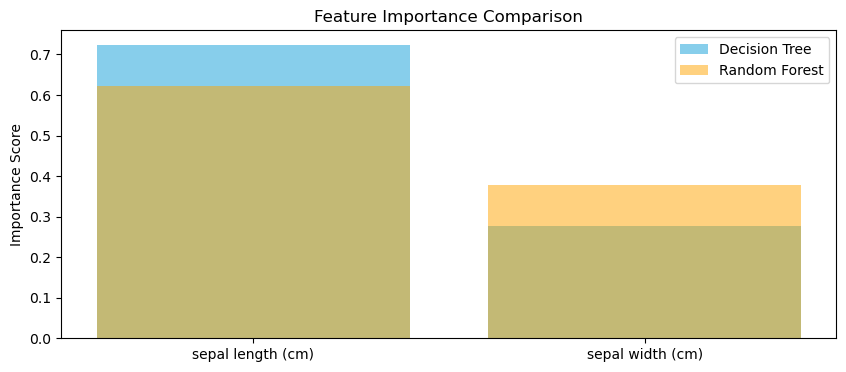

In [4]:
# Get feature importances
tree_importance = tree.feature_importances_
rf_importance = rf.feature_importances_[0:2]  # Only first two features

# Plot feature importance
plt.figure(figsize=(10, 4))
plt.bar(range(2), tree_importance, color='skyblue', label='Decision Tree')
plt.bar(range(2), rf_importance, color='orange', alpha=0.5, label='Random Forest')
plt.xticks(range(2), feature_names)
plt.ylabel("Importance Score")
plt.title("Feature Importance Comparison")
plt.legend()
plt.show()